<a href="https://colab.research.google.com/github/aetev/Learning-stuff-/blob/main/storgae/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install sklearn
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=4e86ebe10d74d9c23032631c87150cef663178b32bdb8e86580e0d01e3682c73
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import tensorflow as tf
from scipy import signal
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [30]:
def lowpass_filter(data, cutoff, order):
  nyq = 0.5 * data.shape[-1]
  b, a = signal.butter(order, cutoff/nyq, 'lowpass')
  return signal.filtfilt(b, a, data)

93084
93084


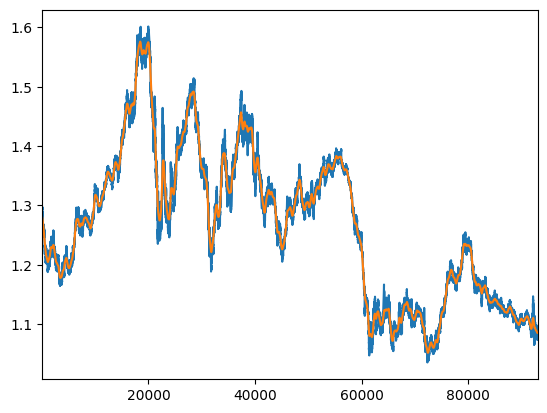

In [51]:
data = pd.read_csv('/content/drive/MyDrive/eurusd_hour.csv')
target = data.pop("BC")
diff = np.diff(target)
ema = ta.sma(target,100)
new = lowpass_filter(target,100,1)


x_min = 1
x_max = 93084
plt.plot(target)
plt.plot(new)
plt.xlim(x_min, x_max)
print(len(target))
print(len(new))

0       344700.0
1       176500.0
2       270500.0
3       330000.0
4        81700.0
          ...   
2995    225000.0
2996    237200.0
2997     62000.0
2998    162500.0
2999    500001.0
Name: median_house_value, Length: 3000, dtype: float64
[[-1.21764     0.91299186 -0.13216279 ...  0.45190479  0.67815547
   1.4836834 ]
 [ 0.61130285 -0.55589886  1.12275824 ... -0.62445889 -0.66485033
   0.08058872]
 [ 0.89510272 -0.87626912 -0.13216279 ...  0.38844189  0.30651793
   1.18971107]
 ...
 [-0.14185486  0.50077947 -1.52019661 ... -0.84488057 -0.98623556
  -0.91436025]
 [ 1.31268951 -0.65895768  0.8907214  ... -2.42400685 -2.46736827
  -0.13936636]
 [-0.10621082 -0.45633209  1.04556877 ... -0.72887278 -0.75731682
   2.01941996]]


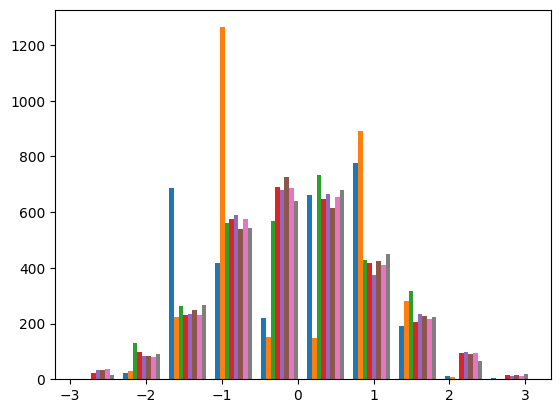

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
target = df.pop("median_house_value")

df = 1+(df-df.min())/(df.max()-df.min())



rng = np.random.RandomState(0)
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
df = pt.fit_transform(df)

ax = plt.hist(df)

print(target)
print(df)

In [ ]:
from keras.regularizers import Regularizer
reg = tf.keras.regularizers.L2(l2=0.01)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(25, activation='relu',kernel_regularizer=reg),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=reg),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation='relu',kernel_regularizer=reg),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(25, activation='relu',kernel_regularizer=reg),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])
loss_fn = tf.keras.losses.MeanAbsoluteError()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['RootMeanSquaredError'])

In [ ]:
hist = model.fit(df, target, epochs=100, batch_size=32)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 205741.7344 - root_mean_squared_error: 234777.3125
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 195498.9688 - root_mean_squared_error: 226316.7188
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 124583.0078 - root_mean_squared_error: 163508.9375
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 95064.8750 - root_mean_squared_error: 126996.1250
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 82637.1328 - root_mean_squared_error: 110247.2188
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 73752.4609 - root_mean_squared_error: 99781.0391
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 71091.5078 - root_mean_squared_error: 95494.0156
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 68998.7812 - root_mean_squared_error: 92618.2422
Epoch 9/100
94/9

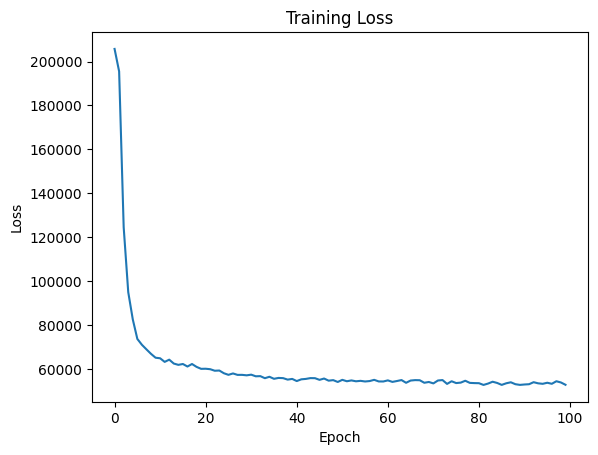

In [ ]:
# Plot the training loss
plt.plot(hist.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()